In [20]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('C:/Users/tjdal/PycharmProjects/farmProductPred/235801_2021 농산물 가격예측 AI 경진대회/public_data/train.csv')

In [3]:
train_data

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,목요일,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,...,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,2020-09-25,금요일,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,...,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,2020-09-26,토요일,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,...,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,2020-09-27,일요일,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,...,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0


In [4]:
# 거래량에 따라 가격도 올라가는 모습
# 그런데 거래량이 급감하면 가격이 급등한다
# 또 이전 시기보다 현재가 더 가격이 올라간 모습
#거래량이 없는 날은 제외한다


chinese_cabbage = train_data[['date','배추_거래량(kg)','배추_가격(원/kg)']]

In [5]:

chinese_cabbage['배추_가격(원/kg)']

0          0.0
1        329.0
2          0.0
3        478.0
4        442.0
         ...  
1728    1839.0
1729    1789.0
1730    1760.0
1731    3066.0
1732    1867.0
Name: 배추_가격(원/kg), Length: 1733, dtype: float64

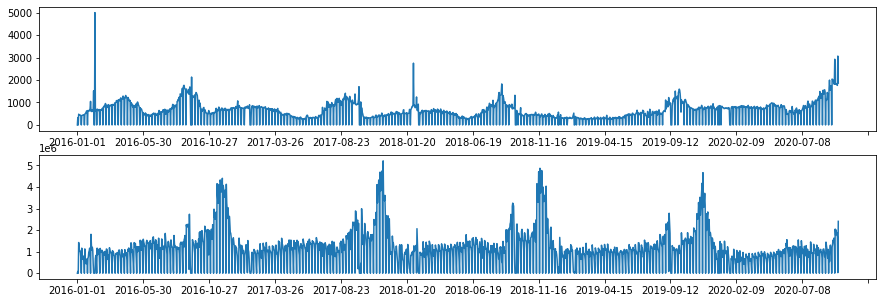

In [6]:
# 배추 가격이 올라가고 나서 거래량이 급증하는 모습?
fig , ax = plt.subplots(2,1 , figsize=(15,5))
ax[0].plot(chinese_cabbage['date']  ,chinese_cabbage['배추_가격(원/kg)'])
ax[1].plot(chinese_cabbage['date']  ,chinese_cabbage['배추_거래량(kg)'])

ax[0].xaxis.set_major_locator(ticker.MultipleLocator(150))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(150))

In [ ]:
model = tf.compat.v1.global_variables_initializer()




In [14]:
# test data
tests_ =  pd.read_csv('C:/Users/tjdal/PycharmProjects/farmProductPred/235801_2021 농산물 가격예측 AI 경진대회/public_data/test_files/test_2020-10-01.csv')

In [15]:
tests_

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2020-09-29,화요일,2064183.3,1787.0,2424383.2,1190.0,1209647.0,966.0,2842.8,25873.0,...,76702.8,3678.0,375798.6,2794.0,450576.5,2350.0,495845.2,3937.0,259765.0,11400.0
1,2020-09-30,수요일,259065.3,1551.0,1044460.0,984.0,136696.4,857.0,35.0,9929.0,...,53183.2,1892.0,387513.8,1858.0,386869.7,1311.0,263761.0,3885.0,121859.6,11649.0


In [17]:
train_data.tail()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
1728,2020-09-24,목요일,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,...,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,2020-09-25,금요일,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,...,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,2020-09-26,토요일,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,...,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,2020-09-27,일요일,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,...,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0
1732,2020-09-28,월요일,2405051.9,1867.0,2747519.5,1147.0,2235784.7,964.0,1630.6,22022.0,...,84155.0,4167.0,554862.6,2873.0,667745.0,2782.0,601841.0,3761.0,382263.4,10998.0


In [ ]:
train_data.date =='2020'


In [ ]:
X = tf.placeholder(tf.float32 , shape= [None,4] )

In [ ]:
kamis_certi_key = ''

In [41]:
weather_key = 'dVM34WWO%2BUOXK8%2B2M9YsPVK1zF4xGdEwYT%2B2%2BqvGA2Z66M3j36KxHgo2bFT4Dl4Z1ZU9Q8Nx27xqytlRk%2Bk9UA%3D%3D'
# 너무 긴 기간 요청 불가

url = 'http://apis.data.go.kr/1390802/AgriWeather/WeatherObsrInfo/GnrlWeather/getWeatherTermSunList?serviceKey=dVM34WWO%2BUOXK8%2B2M9YsPVK1zF4xGdEwYT%2B2%2BqvGA2Z66M3j36KxHgo2bFT4Dl4Z1ZU9Q8Nx27xqytlRk%2Bk9UA%3D%3D&Page_No=1&Page_Size=1&begin_Date=2016-01-01&end_Date=2016-01-20&obsr_Spot_Code=323891D002'

res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')


<response>
<header>
<result_code>200</result_code>
<result_msg>OK</result_msg>
</header>
<body>
<rcdcnt>1</rcdcnt>
<page_no>1</page_no>
<total_count>2</total_count>
<items>
<item>
<no>1</no>
<stn_code>323891D002</stn_code>
<stn_name>완주군 이서면</stn_name>
<date>2016-01 1P</date>
<temp>2.5</temp>
<max_temp>13</max_temp>
<min_temp>-5</min_temp>
<hum>74.7</hum>
<widdir>270.2</widdir>
<wind>1.1</wind>
<rain>0</rain>
<sun_time>2849</sun_time>
<sun_qy>81.7</sun_qy>
<condens_time>0</condens_time>
<gr_temp>2</gr_temp>
<soil_temp>4.8</soil_temp>
<soil_wt></soil_wt>
</item>
</items>
</body>
</response>



In [ ]:
print(soup)

In [42]:
print(soup)


<response>
<header>
<result_code>200</result_code>
<result_msg>OK</result_msg>
</header>
<body>
<rcdcnt>1</rcdcnt>
<page_no>1</page_no>
<total_count>2</total_count>
<items>
<item>
<no>1</no>
<stn_code>323891D002</stn_code>
<stn_name>완주군 이서면</stn_name>
<date>2016-01 1P</date>
<temp>2.5</temp>
<max_temp>13</max_temp>
<min_temp>-5</min_temp>
<hum>74.7</hum>
<widdir>270.2</widdir>
<wind>1.1</wind>
<rain>0</rain>
<sun_time>2849</sun_time>
<sun_qy>81.7</sun_qy>
<condens_time>0</condens_time>
<gr_temp>2</gr_temp>
<soil_temp>4.8</soil_temp>
<soil_wt></soil_wt>
</item>
</items>
</body>
</response>

